## Búsqueda

En esta libreta exploraremos búsqueda en gráficas.

Antes de empezar con búsqueda, debemos pensar en las posibles maneras de expresar una gráfica en la computadora: A veces la tenemos en memoria, a veces no, etc.

Posibles maneras de expresar una gráfica:
1. Una lista de aristas
2. Una matriz de adyacencia
3. Para cada vértice tenemos una manera de encontrar sus vecinos.

Pros y cons:
1. Es sencillo recorrer todas las aristas, ordenarlas, etc. Agregar vértices o aristas es trivial. Quitarlos es muy pesado.
2. Es sencillo saber si dos vértices están conectados o no. Agregar y quitar aristas es trivial. Quitar o agregar vértices es muy pesado. Toma una cantidad cuadrática de memoria.
3. Dependiendo de la estructura de datos que usemos para guardar vecinos qué tan fácil o difícil sea encontrar si dos están conectados, etc. Es fácil encontrar los vecinos de un vértice, y la mayoría de los algoritmos en gráficas requieren esto.


En matemáticas muchas veces vamos a tener gráficas gigantescas en donde más bien podemos saber los "vecinos" de un vértice.

Para empezar, vamos a ver cómo programaríamos un resolvedor de laberintos (medio chafón).

In [8]:
import random

In [54]:
def crear_laberinto(n,m,p=0.25):
    M = [[0]*m for i in range(n)]
    for x in range(n):
        for y in range(m):
            if random.random() < p:
                M[x][y] = 1
    M[0][0] = 0
    M[-1][-1] = 0
    return M

Digamos que queremos llegar de la casilla (0,0) a la casilla (n-1,m-1) (la última).

In [9]:
from copy import deepcopy

In [ ]:
def vecinos(M,x,y):
    n,m = len(M), len(M[0])
    candidatos = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]
    V = []
    for xp,yp in candidatos:
        if not (xp < 0 or yp < 0 or xp>=n or yp >= m):
            if M[xp][yp] == 0:
                V.append((xp,yp))
    return V

In [ ]:
def encontrar_camino(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = [(0,0)]
    frontera = [caminotrivial]
    explorados = {(0,0)}
    
    while frontera:
        P = frontera.pop(0)
        u = P[-1]
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return P
        
        expander_camino(M,P,frontera,explorados)
        
    print("No hay camino!")
    return None

In [ ]:
def es_objetivo(M,u):
    n,m = len(M), len(M[0])
    return u == (n-1,m-1)

In [ ]:
def expander_camino(M,P,frontera,explorados):
    u = P[-1]
    for v in vecinos(M,*u):
        if v not in explorados:
            Q = deepcopy(P)
            Q.append(v)
            frontera.append(Q)

In [ ]:
M=crear_laberinto(10,10,0.25); M

In [ ]:
camino=encontrar_camino(M); camino

In [ ]:
def imprimir_camino(M,camino):
    A = deepcopy(M)
    for x,y in camino:
        A[x][y] = 8
    return A

In [ ]:
imprimir_camino(M,camino)

In [ ]:
L = [1,2,3,4,5]

In [ ]:
L.pop(2)

In [ ]:
L

## BFS y deque

En el programa anterior, si cambiamos `P = frontera.pop()` por `P = frontera.pop(0)` estaremos haciendo BFS (breadth-first search) en vez de DFS.

PERO hay un problema: pop(0) es extremadamente lento: saca el 0-avo recorriendo todos los demás un espacio en memoria a la izquierda.

Entonces debemos usar otra estructura de datos: `deque` (double ended queue).

In [ ]:
from collections import deque

In [ ]:
D = deque()

In [ ]:
D.append(8)

In [ ]:
D.appendleft(7)

In [ ]:
D

In [ ]:
D.pop()

In [ ]:
D

In [ ]:
D.popleft()

In [ ]:
D

In [ ]:
def encontrar_caminoBFS(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = [(0,0)]
    frontera = deque([caminotrivial])
    explorados = {(0,0)}
    
    while frontera:
        P = frontera.popleft()
        u = P[-1]
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return P
        
        expander_camino(M,P,frontera,explorados)
        
    print("No hay camino!")
    return None

In [ ]:
M

In [ ]:
camino = encontrar_caminoBFS(M)

In [ ]:
imprimir_camino(M,camino)

## DFS, recursión, y la callstack (pila de llamadas)

Hay otra manera de programar DFS que a veces es más sencilla: con recursión.

Digamos que tenemos, por ejemplo, un árbol con raíz, y para cada nodo quisiéramos saber cuántos nodos hay "debajo" de él.

In [ ]:
graphs.RandomTree(14)

In [ ]:
def crear_arbol_aleatorio(n):
    hijos = [[] for i in range(n)]
    for i in range(1,n):
        padre = random.randint(0,i-1)
        hijos[padre].append(i)
    return hijos

In [ ]:
arbol = crear_arbol_aleatorio(18); arbol

In [ ]:
def arbol2sage(arbol):
    n = len(arbol)
    G = Graph(n)
    for u in range(n):
        for v in arbol[u]:
            G.add_edge(u,v)
    return G

In [ ]:
arbol2sage(arbol)

In [ ]:
def factorial(n):
    if n < 2: return 1
    return n*factorial(n-1)

In [ ]:
factorial(10000)

In [ ]:
r = 1
for i in range(1,10000):
    r *= i
r

In [ ]:
def cuantos_nodos_debajo(T, v):
    respuesta = 0
    for u in T[v]:
        respuesta += cuantos_nodos_debajo(T,u)+1
    return respuesta

In [ ]:
cuantos_nodos_debajo(arbol,2)

Al llamar "cuantos_nodos_debajo" estamos en realidad usando la "pila de llamadas" (callstack) como la frontera!

## Ejercicios

1. Dada una gráfica (una lista de $n$ listas de vecinos), decide si es conexa o no.
2. Modifica el programa anterior para encontrar las componentes conexas
3. Bien-colorea una gráfica con $k$ colores si es posible.

In [10]:
def grafica_aleatoria(n,p = 0.5):
    G = [[] for i in range(n)] # grafica vacia
    for u in range(n):
        for v in range(u+1,n):
            if random.random() < p:
                G[u].append(v)
                G[v].append(u)
    return G

In [11]:
S = Graph(5)

In [12]:
def to_sage(G):
    n = len(G)
    S = Graph(n)
    for u in range(n):
        for v in G[u]:
            if u < v:
                S.add_edge((u,v))
    return S

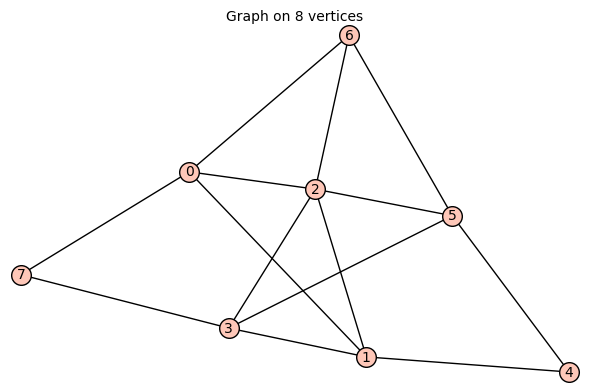

In [13]:
to_sage(grafica_aleatoria(8,0.5))

### Bonus: encontrar el error :(

In [ ]:
G=[[0,1,0,1,1,0,0,0],[1,0,1,0,0,1,0,0],[0,1,0,1,0,0,1,0],[1,0,1,0,0,0,0,1],[1,0,0,0,0,1,0,1],[0,1,0,0,1,0,1,0],[0,0,1,0,0,1,0,1],[0,0,0,1,1,0,1,0]]

In [ ]:
Graph(Matrix(G))

## Soluciones

#### Decidir si una gráfica es conexa.

In [ ]:
G

In [ ]:
def es_conexa(G):
    n = len(G)
    if n < 2: return True
    
    explorados = [False]*n
    dfs_marcar_conectados(G,0,explorados)
    return False not in explorados
    

In [ ]:
def dfs_marcar_conectados(G,v,explorados):
    explorados[v] = True
    for u in G[v]:
        if not explorados[u]:
            dfs_marcar_conectados(G,u,explorados)

In [ ]:
G = grafica_aleatoria(10,0.2); to_sage(G)

In [ ]:
es_conexa(G)

Solucion de componentes conexas

In [ ]:
def componentes_conexas(G):
    n = len(G)
    if n < 2: return True
    
    colores = [-1]*n
    color = 0
    for v in range(n):
        if colores[v] == -1:
            dfs_colorear(G,v,colores,color)
            color += 1
    
    return colores

def dfs_colorear(G,v,colores,color):
    colores[v] = color
    for u in G[v]:
        if colores[u] == -1:
            dfs_colorear(G,u,colores,color)

In [ ]:
componentes_conexas(G)

"Solucion" de bien-coloreada

In [ ]:
[0,4,2,1]

In [1]:
def condicion():
    print("Hola mundo!")
    return True

In [ ]:
False and (cualquier cosa)

In [2]:
False and condicion()

False

In [3]:
True or condicion()

True

In [4]:
condicion() and False

Hola mundo!


False

In [5]:
def es_valida(G,coloracion):
    u = len(coloracion)-1
    for v in G[u]:
        if v < u and coloracion[u] == coloracion[v]:
            return False
    return True

In [6]:
def vecinos(G,coloracion,k):
    V = []
    for color in range(k):
        nueva = coloracion+[color]
        if es_valida(G,nueva):
            V.append(nueva)
    return V

In [7]:
def bien_colorear(G,k):
    n = len(G)
    frontera = [[0]]
    while frontera:
        coloracion = frontera.pop()
        if len(coloracion) == n:
            return coloracion
        for c in vecinos(G,coloracion,k):
            frontera.append(c)
    print("No hay coloración!")
    return None

In [22]:
G = grafica_aleatoria(6,0.4)

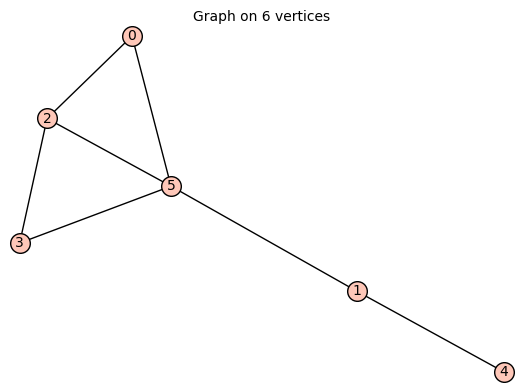

In [23]:
to_sage(G)

In [26]:
bien_colorear(G,3)

[0, 2, 2, 0, 1, 1]

## Colas de prioridad

Una **cola de prioridad** es una estructura de datos en donde "sale" el elemento de mayor prioridad (en vez de el primero como en las colas o el último, como en las pilas).

Vamos a implementar Dijkstra con una cola de prioridad.

Desafortunadamente, las priority queues son medio raras en python, porque esperan que tú sepas lo que haces. Entonces hice yo mi propia priority queue. No se preocupen mucho qué hace cada cosa, eso es python más avanzado, pero es simplemente un "disfraz" sobre una heapq.

In [29]:
import heapq

class PriorityQueue():
    def __init__(self, iterable = []):
        self.items = list(iterable)
        heapq.heapify(self.items)
        
    def insert(self, x): heapq.heappush(self.items, x)
        
    def pop(self): return heapq.heappop(self.items)
    
    def __len__(self): return len(self.items)
    
    def __iter__(self): return iter(self.items)
    
    def __repr__(self): return f"PriorityQueue({repr(self.items)})"

In [45]:
L = [4,1,5,2,3,7,10]
P = PriorityQueue(L)

In [31]:
P

PriorityQueue([1, 2, 5, 4, 3, 7, 10])

In [32]:
for p in P:
    print(p)

1
2
5
4
3
7
10


In [50]:
P.insert(1)

In [51]:
P

PriorityQueue([-5, 1, 1, 2, 3, 5, 10, 4, 53, 5, 8, 7])

In [52]:
while len(P) > 0:
    print(P.pop())

-5
1
1
2
3
4
5
5
7
8
10
53


In [44]:
P

PriorityQueue([5, 9, 7, 10, 55])

### Dijkstra

El algoritmo de Dijkstra es simplemente el algoritmo que ya hemos estado viendo, pero que en lugar de escoger siempre el último o el primer camino de la frontera, escogemos el más pequeño.

Entonces debemos darle el "costo" a cada camino.

In [56]:
M = crear_laberinto(10,10); M

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0]]

In [57]:
def vecinos(M,x,y):
    n,m = len(M), len(M[0])
    candidatos = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]
    V = []
    for xp,yp in candidatos:
        if not (xp < 0 or yp < 0 or xp>=n or yp >= m):
            if M[xp][yp] == 0:
                V.append((xp,yp))
    return V

In [63]:
def encontrar_camino_dijkstra(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = (0,[(0,0)]) # (costo, camino como lista de nodos)
    frontera = PriorityQueue([caminotrivial])
    explorados = set()
    
    while frontera:
        costo, camino = frontera.pop()
        u = camino[-1]
        if u in explorados:
            continue
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return camino
        
        expander_camino(M,camino,frontera,explorados)
        
    print("No hay camino!")
    return None

In [64]:
def es_objetivo(M,u):
    n,m = len(M), len(M[0])
    return u == (n-1,m-1)

In [65]:
def expander_camino(M,camino,frontera,explorados):
    u = camino[-1]
    for v in vecinos(M,*u):
        if v not in explorados:
            nuevo = deepcopy(camino)
            nuevo.append(v)
            costo_nuevo = len(nuevo)-1
            frontera.insert((costo_nuevo, nuevo))

In [73]:
M = crear_laberinto(50,50,0.2)

In [74]:
%%timeit
encontrar_camino_dijkstra(M)

3.25 s ± 96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Una mejora para no hacer copias

- Un problema con el algoritmo de búsqueda como lo vimos hasta ahora es que **hacemos muchas copias de los caminos**. 
- Podemos hacerlo mejor: A cada nodo le guardamos su costo y su "padre", y al final *reconstruimos* el camino. 
- Veamos cómo implementarlo.

In [68]:
INF = 999999999999999999
def encontrar_camino_dijkstra_mejorado(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = (0,(0,0)) # (costo, ultimo nodo)
    frontera = PriorityQueue([caminotrivial])
    
    explorados = set()
    costos = {(0,0): 0}
    padres = {(0,0): None}
    
    while frontera:
        costo, u = frontera.pop()
        
        if es_objetivo(M,u): 
            return reconstruir_camino(u,padres)
               
        if u in explorados: 
            continue
        explorados.add(u)
        
        costos[u] = costo
        
        for v in vecinos(M,*u):
            costo_anterior = costos.setdefault(v,INF)
            # costo_anterior = costos[v] (a menos que no exista v en las llaves de costos, y entonces es INF)
            
            costo_actual = costo+1
            
            if costo_actual < costo_anterior:
                costos[v] = costo_actual
                padres[v] = u
                frontera.insert((costo_actual,v))
                
        
    print("No hay camino!")
    return None

In [69]:
def reconstruir_camino(nodo, padres):
    camino = [nodo]
    while padres[nodo] is not None:
        nodo = padres[nodo]
        camino.append(nodo)
    return list(reversed(camino))

In [75]:
%%timeit
encontrar_camino_dijkstra_mejorado(M)

22.3 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
A = {1:2}

In [ ]:
A.setdefault(4,3)

In [ ]:
A

## A*

Ejercicios: 

1. Modifica el código anterior para hacer A* en vez de Dijkstra
2. Resuelve el juego del 15!! (usa tuplas para poder hashiar)
3. Si tienes dos caminos cuyo costo+heurística es igual, ¿cuál exploras primero?

### Solución del problema 3

In [109]:
M = (
    (12,5,11,2),
    (1,6,15,4),
    (10,3,13,8),
    (9,16,14,7),
)

In [68]:
M = (
    (1,2,3,4),
    (5,6,7,8),
    (9,10,11,12),
    (13,14,15,16),
)

In [128]:
def imprimir_matriz(M):
    for renglon in M:
        for a in renglon:
            if a == 16:
                a = '*'
            print(a,end="\t")
        print("")

In [111]:
def vecinos(M):
    pass # llena aquí

In [114]:
def mover_ficha(M,xp,yp,x,y):
    Q = to_list(M)
    Q[xp][yp],Q[x][y] = Q[x][y],Q[xp][yp]
    return tuple([tuple(q) for q in Q]) # qué horror!

In [129]:
imprimir_matriz(M)

12	5	11	2	
1	6	15	4	
10	3	13	8	
9	*	14	7	


In [130]:
imprimir_matriz(vecinos(M)[0])

12	5	11	2	
1	6	15	4	
10	*	13	8	
9	3	14	7	


In [131]:
def heuristica(M):
    pass
    # llena aqui

In [132]:
heuristica(M)

In [135]:
def reconstruir_camino(nodo, padres):
    camino = [nodo]
    while padres[nodo] is not None:
        nodo = padres[nodo]
        camino.append(nodo)
    return list(reversed(camino))

In [136]:
def es_objetivo(M):
    return heuristica(M) == 0

Modifica el siguiente código en las lineas marcadas

In [137]:
INF = 999999999999999999
def resolver_15(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = (0,(0,0)) # MODIFICA ESTA!
    frontera = PriorityQueue([caminotrivial])
    
    explorados = set()
    costos = {(0,0): 0} # MODIFICA ESTA!
    padres = {(0,0): None} # MODIFICA ESTA!
    
    while frontera:
        costo, u = frontera.pop() # MODIFICA ESTA!
        
        if es_objetivo(M,u): 
            return reconstruir_camino(u,padres)
               
        if u in explorados: 
            continue
        explorados.add(u)
        
        costos[u] = costo
        
        for v in vecinos(M,*u):
            costo_anterior = costos.setdefault(v,INF) 
            # costo_anterior = costos[v] (a menos que no exista v en las llaves de costos, y entonces es INF)
            
            costo_actual = costo+1
            
            if costo_actual < costo_anterior:
                costos[v] = costo_actual
                padres[v] = u
                frontera.insert((costo_actual,v)) # MODIFICA ESTA!
                
        
    print("No hay camino!")
    return None

In [138]:
camino = resolver_15(M)

TypeError: es_objetivo() takes 1 positional argument but 2 were given

In [139]:
[(imprimir_matriz(c),print("-----------")) for c in camino];

12	5	11	2	
1	6	15	4	
10	3	13	8	
9	*	14	7	
-----------
12	5	11	2	
1	6	15	4	
10	3	13	8	
9	14	*	7	
-----------
12	5	11	2	
1	6	15	4	
10	3	*	8	
9	14	13	7	
-----------
12	5	11	2	
1	6	*	4	
10	3	15	8	
9	14	13	7	
-----------
12	5	11	2	
1	*	6	4	
10	3	15	8	
9	14	13	7	
-----------
12	*	11	2	
1	5	6	4	
10	3	15	8	
9	14	13	7	
-----------
*	12	11	2	
1	5	6	4	
10	3	15	8	
9	14	13	7	
-----------
1	12	11	2	
*	5	6	4	
10	3	15	8	
9	14	13	7	
-----------
1	12	11	2	
5	*	6	4	
10	3	15	8	
9	14	13	7	
-----------
1	*	11	2	
5	12	6	4	
10	3	15	8	
9	14	13	7	
-----------
1	11	*	2	
5	12	6	4	
10	3	15	8	
9	14	13	7	
-----------
1	11	2	*	
5	12	6	4	
10	3	15	8	
9	14	13	7	
-----------
1	11	2	4	
5	12	6	*	
10	3	15	8	
9	14	13	7	
-----------
1	11	2	4	
5	12	6	8	
10	3	15	*	
9	14	13	7	
-----------
1	11	2	4	
5	12	6	8	
10	3	*	15	
9	14	13	7	
-----------
1	11	2	4	
5	12	6	8	
10	3	13	15	
9	14	*	7	
-----------
1	11	2	4	
5	12	6	8	
10	3	13	15	
9	14	7	*	
-----------
1	11	2	4	
5	12	6	8	
10	3	13	*	
9	14	7	15	
-----------
1	11	2	4	
5	12	6	*	
10	3	13	